# Neural Networks on MNIST Dataset

Import dependencies.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

Read MNIST handwritten digits data from Pandas. Note the data is somewhat large so it is stored as a zipped CSV. 

In [2]:
df = pd.read_csv('https://bit.ly/3ilJc2C', compression='zip', delimiter=",")
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


Separate the input and output variables. 

In [3]:
X = df.values[:, :-1] / 255.0
Y = df.values[:, -1]

Print out the number of instances of each class. Stratify so that each class is sampled equally. 

In [4]:
# Get a count of each group to ensure samples are equitably balanced
print(df.groupby(["class"]).agg({"class" : [np.size]}))

# Separate training and testing data
# Note that I use the 'stratify' parameter to ensure
# each class is proportionally represented in both sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33, random_state=10, stratify=Y)

      class
       size
class      
0      6903
1      7877
2      6990
3      7141
4      6824
5      6313
6      6876
7      7293
8      6825
9      6958


Train a neural network using the logistic function as the hidden layer activation function with 100 nodes. Set a higher learning rate of .01. 

In [5]:
nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(100, ),
                   activation='logistic',
                   max_iter=480,
                   learning_rate_init=.1)

nn.fit(X_train, Y_train)

print("Test set score: %f" % nn.score(X_test, Y_test))

cf = confusion_matrix(y_true=Y_test, y_pred=nn.predict(X_test))
print(cf)

Test set score: 0.978485
[[2245    1    7    1    0    8    6    0    6    4]
 [   0 2572    8    5    2    0    4    4    0    4]
 [   5    4 2262    6    2    1    3   12    8    4]
 [   1    3   22 2291    0   23    0    7    7    3]
 [   3    4    5    1 2187    2    9    4    1   36]
 [   3    1    1   18    1 2038    7    2    4    8]
 [   8    3    2    1    8   11 2228    1    6    1]
 [   2    6    8    5    9    1    1 2357    7   11]
 [   8    7    4   11    5   11    6    2 2187   11]
 [   6    1    2    8   22    5    0   10    6 2236]]


Display heat map for each digit character weights. 

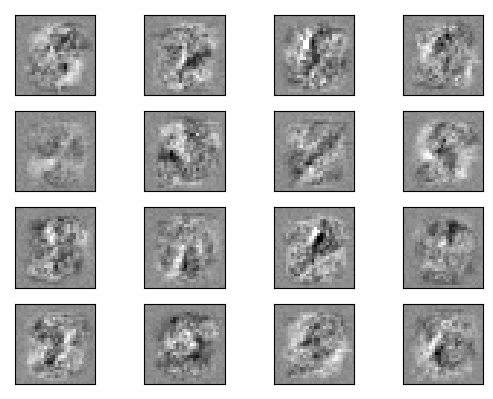

In [6]:
# Display heat map
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 4)

# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = nn.coefs_[0].min(), nn.coefs_[0].max()
for coef, ax in zip(nn.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())